In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!kaggle datasets download -d sootersaalu/amazon-top-50-bestselling-books-2009-2019

  0% 0.00/14.5k [00:00<?, ?B/s]
100% 14.5k/14.5k [00:00<00:00, 25.0MB/s]


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  amazon-top-50-bestselling-books-2009-2019.zip
  inflating: bestsellers with categories.csv  


In [ ]:
df=pd.read_csv('bestsellers with categories.csv')

In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.shape

(550, 7)

In [ ]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

### see list of authors

In [ ]:
df['Author'].sort_values().unique()

array(['Abraham Verghese', 'Adam Gasiewski', 'Adam Mansbach', 'Adir Levy',
       'Admiral William H. McRaven', 'Adult Coloring Book Designs',
       'Alan Moore', 'Alex Michaelides', 'Alice Schertle', 'Allie Brosh',
       'American Psychiatric Association',
       'American Psychological Association', 'Amor Towles', 'Amy Ramos',
       'Amy Shields', 'Andy Weir', 'Angie Grace', 'Angie Thomas',
       'Ann Voskamp', 'Ann Whitford Paul', 'Anthony Bourdain',
       'Anthony Doerr', 'Atul Gawande', 'Audrey Niffenegger',
       'B. J. Novak', 'Bessel van der Kolk M.D.', 'Bill Martin Jr.',
       "Bill O'Reilly", 'Bill Simmons', 'Blue Star Coloring',
       'Bob Woodward', 'Brandon Stanton', 'Brené Brown',
       'Brian Kilmeade', 'Bruce Springsteen', 'Carol S. Dweck',
       'Celeste Ng', 'Charlaine Harris', 'Charles Duhigg',
       'Charles Krauthammer', 'Cheryl Strayed', 'Chip Gaines',
       'Chip Heath', 'Chris Cleave', 'Chris Kyle', 'Chrissy Teigen',
       'Christina Baker Kline', 

### Renaming to avoid duplicate names


In [ ]:
df = df.replace('George R. R. Martin', 'George R.R. Martin')
df = df.replace('J. K. Rowling', 'J.K. Rowling')

### Visualising fiction and non fiction counts

In [ ]:
#lets plt the number of books by genre
genre_count=df['Genre'].value_counts()
print(genre_count)

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64


([<matplotlib.patches.Wedge at 0x7fc0b69b4f50>,
 [Text(-0.218449509639842, 1.078090817945368, 'Non-fiction'),
  Text(0.2184495096398414, -1.0780908179453683, 'fiction')])

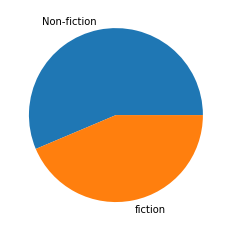

In [ ]:
genre_count=np.array(genre_count)
plt.pie(genre_count,labels=['Non-fiction','fiction'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


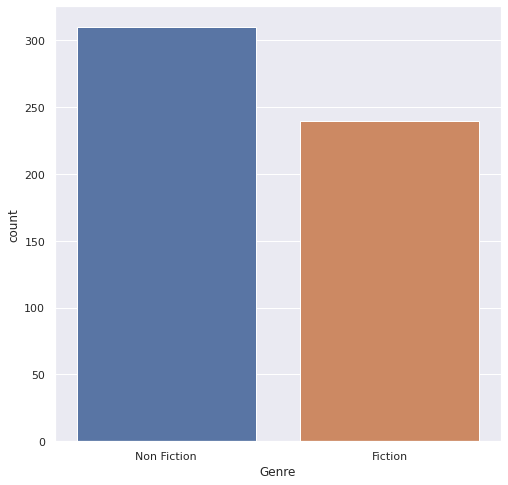

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_theme(style="darkgrid")
sns.countplot(df['Genre'])

#visualising top 10 authors


In [ ]:
#list of top 10 writers who have featured the most
top10authors=df['Author'].value_counts()[:10]

In [ ]:
top10authornames=df['Author'].value_counts()[:10].index.tolist()

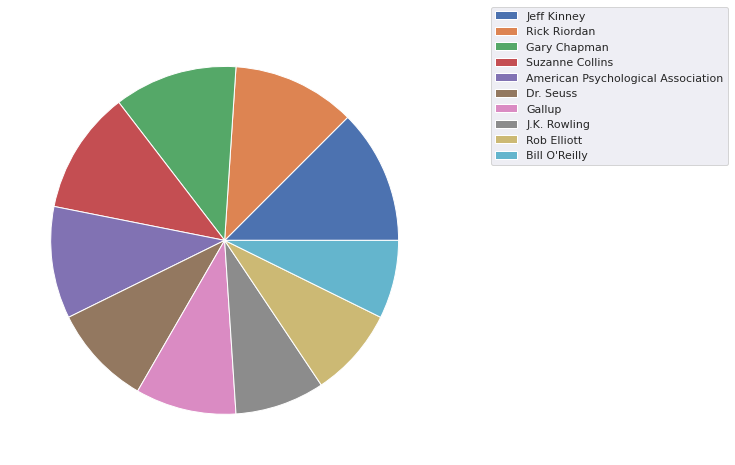

In [ ]:
plt.pie(top10authors)
plt.legend(top10authornames,bbox_to_anchor=(1.1, 1.05))

In [ ]:
df['Price'].max()

105

In [ ]:
#let's see if the same book has featured more than once and count occurance of such

In [ ]:
df['Name'].value_counts()[:10]

Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The Very Hungry Caterpillar                                                           7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
The Five Dysfunctions of a Team: A Leadership Fable                                   5
Laugh-Out-Loud Jokes for Kids                                                         5
The 5 Love Languages: The Secret to Love That Lasts                                   5
Name: Name, dtype: int64

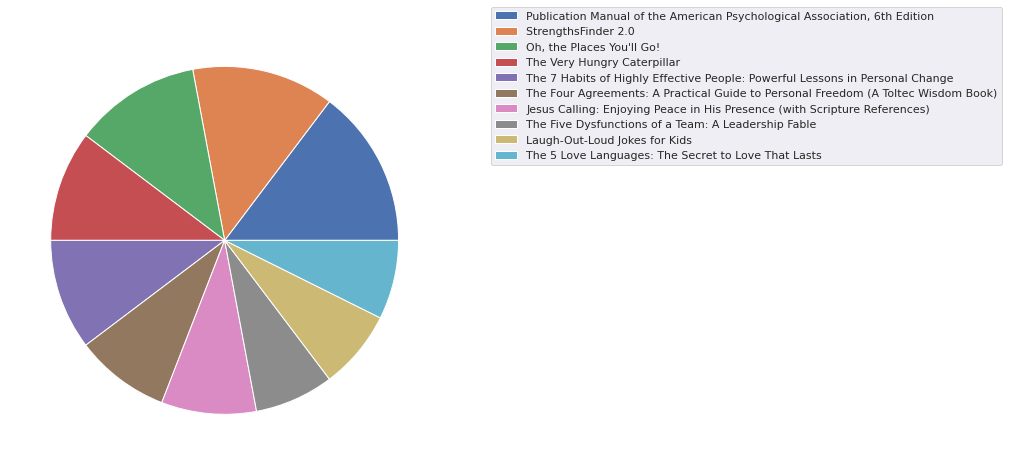

In [ ]:
plt.pie(df['Name'].value_counts()[:10])
plt.legend(df['Name'].value_counts()[:10].index.tolist(),bbox_to_anchor=(1.1, 1.05))


In [ ]:
df.Price.unique()

array([  8,  22,  15,   6,  12,  11,  30,   3,   2,  32,   5,  17,   4,
        13,  14,   9,  24,  21,  18,   0,  28,  16,  10, 105,  20,   1,
         7,  19,  54,  52,  25,  27,  46,  39,  53,  40,  36,  82,  23,
        42])

In [ ]:
df['Price'] = df['Price'].replace(0, np.array(df['Price'].mean()))

In [ ]:
df['Price'].unique()

array([  8. ,  22. ,  15. ,   6. ,  12. ,  11. ,  30. ,   3. ,   2. ,
        32. ,   5. ,  17. ,   4. ,  13. ,  14. ,   9. ,  24. ,  21. ,
        18. ,  13.1,  28. ,  16. ,  10. , 105. ,  20. ,   1. ,   7. ,
        19. ,  54. ,  52. ,  25. ,  27. ,  46. ,  39. ,  53. ,  40. ,
        36. ,  82. ,  23. ,  42. ])

In [ ]:
from scipy import stats

### seeing price distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


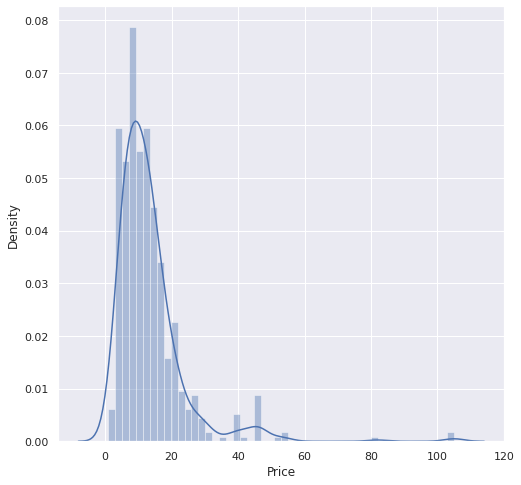

In [ ]:
sns.distplot(df['Price'])

In [ ]:
data_interval=np.array(df['Price'])

In [ ]:
classInterval = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100,110]

In [ ]:
values, base = np.histogram(data_interval, bins=classInterval)

In [ ]:
values.sum()
#so it confirms eveything has been converted to distribution we want

550

In [ ]:
values

array([226, 239,  54,   9,  16,   3,   0,   0,   1,   0,   2])

Text(0.5, 1.0, 'Price')

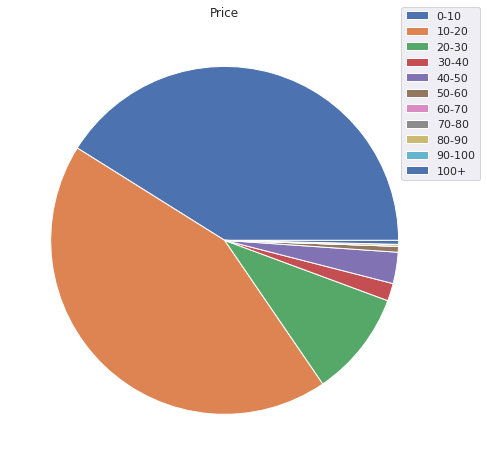

In [ ]:
plt.pie(values)
plt.legend(['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100+'],bbox_to_anchor=(1.1, 1.05))
plt.title('Price')

## user ratings

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


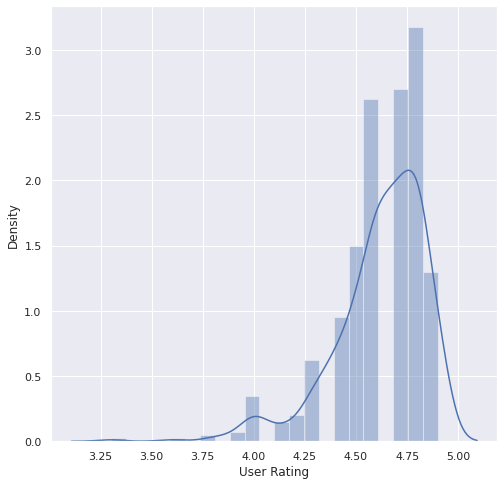

In [ ]:
sns.distplot(df['User Rating'])

In [ ]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

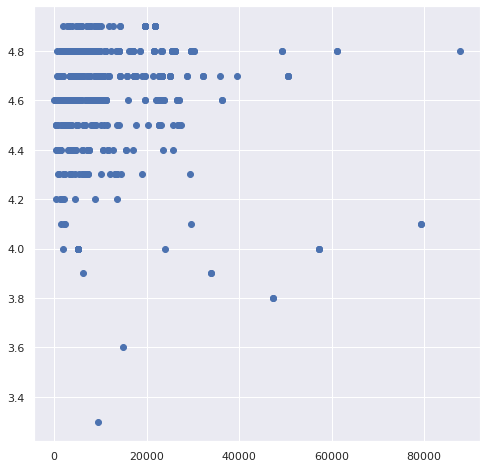

In [ ]:
plt.scatter(df['Reviews'],df['User Rating'])

In [ ]:
#mean of both ratings fiction and non fiction

In [ ]:
df['Genre'].nunique()
#ok so no typos there

2

In [ ]:
filt_nonfiction=df[df['Genre']=='Non Fiction']

In [ ]:
filt_fiction=df[df['Genre']=='Fiction']

In [ ]:
#now we want to compare fiction and non fiction by their average ratings, avg no of revies, avg price and distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


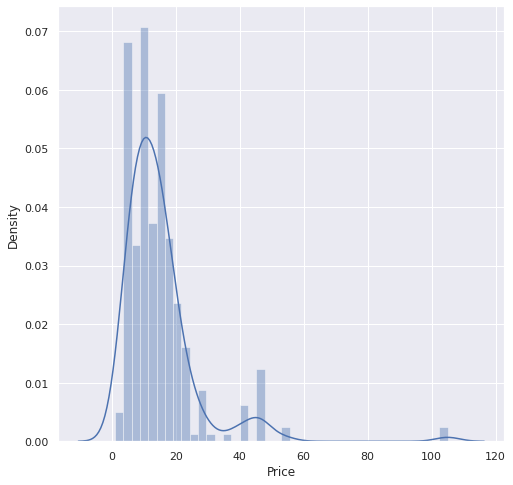

In [ ]:
sns.distplot(filt_nonfiction['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


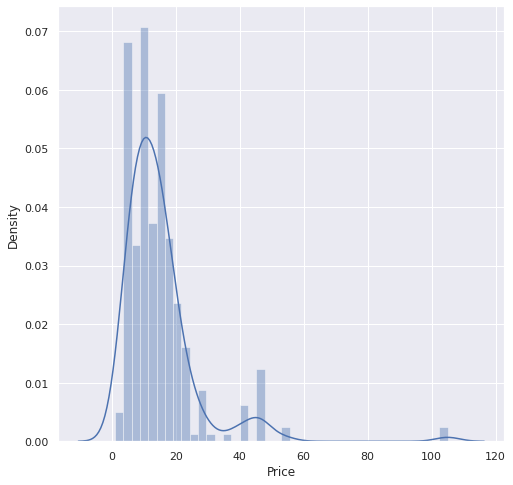

In [ ]:
sns.distplot(filt_nonfiction['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


9065.145161290322

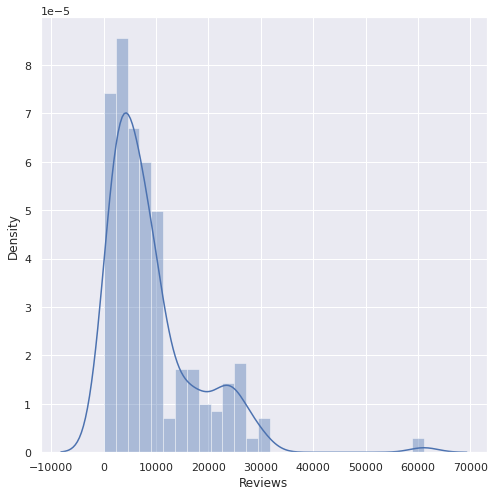

In [ ]:
sns.distplot(filt_nonfiction['Reviews'])
filt_nonfiction['Reviews'].mean()

In [ ]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

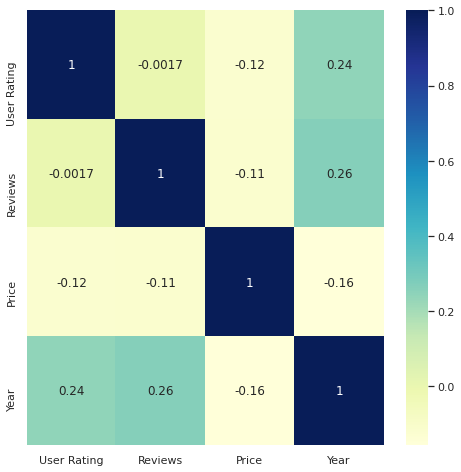

In [ ]:
sns.heatmap(df[['User Rating','Reviews','Price','Year']].corr(), cmap="YlGnBu", annot=True)